<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/UnsupervisedLearning_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

#dataset
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

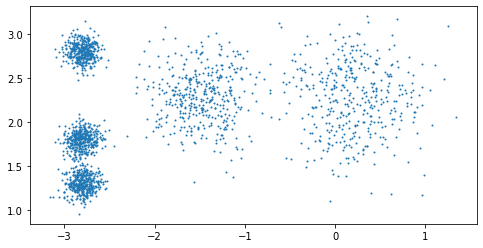

In [3]:
#dataset plot
plt.figure(figsize=(8, 4))
plt.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [4]:
#k-mean
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
print(y_pred, y_pred.shape)
print(kmeans.labels_, y_pred is kmeans.labels_)
print(kmeans.cluster_centers_, kmeans.cluster_centers_.shape)

[0 4 2 ... 3 2 4] (2000,)
[0 4 2 ... 3 2 4] True
[[-2.80037642  1.30082566]
 [-1.46679593  2.28585348]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-2.80389616  1.80117999]] (5, 2)


In [5]:
#new datat predict
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
print(kmeans.predict(X_new))

[2 2 3 3]


[[2.88633901 1.49439034 0.32995317 2.9042344  2.81093633]
 [5.84236351 4.4759332  2.80290755 5.84739223 5.80730058]
 [1.71086031 1.69136631 3.29399768 0.29040966 1.21475352]
 [1.21567622 1.54808703 3.21806371 0.36159148 0.72581411]]


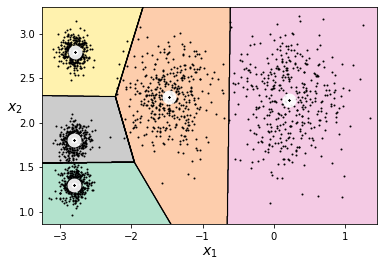

In [6]:
#결정 경계

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plot_decision_boundaries(kmeans, X)

print(kmeans.transform(X_new))

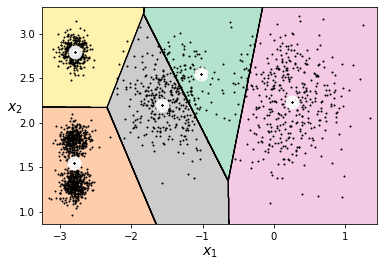

In [7]:
#random cluster
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1)
kmeans_random.fit(X)

plot_decision_boundaries(kmeans_random, X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=5
  after removing the cwd from sys.path.


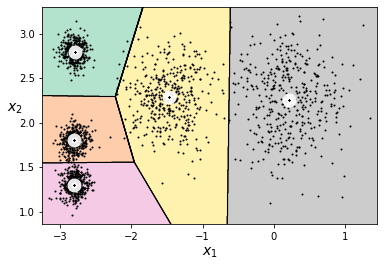

In [8]:
#초기화
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans_init = KMeans(n_clusters=k, init=good_init, n_init=5)
kmeans_init.fit(X)

plot_decision_boundaries(kmeans_init, X)

In [9]:
#이니셔 값
print(kmeans.inertia_, kmeans_random.inertia_, kmeans_init.inertia_)

211.5985372581684 236.93323853907066 211.5985372581684


In [10]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=k)
mini_batch_kmeans.fit(X)
#mini_batch_kmeans.partial_fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

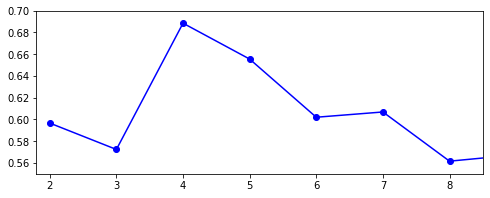

In [11]:
#최적의 클러스터 개수 찾기
from sklearn.metrics import silhouette_score

#print(silhouette_score(X, kmeans.labels_))

#1~9개의 클러스터를 가진 kmeans 배열
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [12]:
kmeans_per_k[0].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

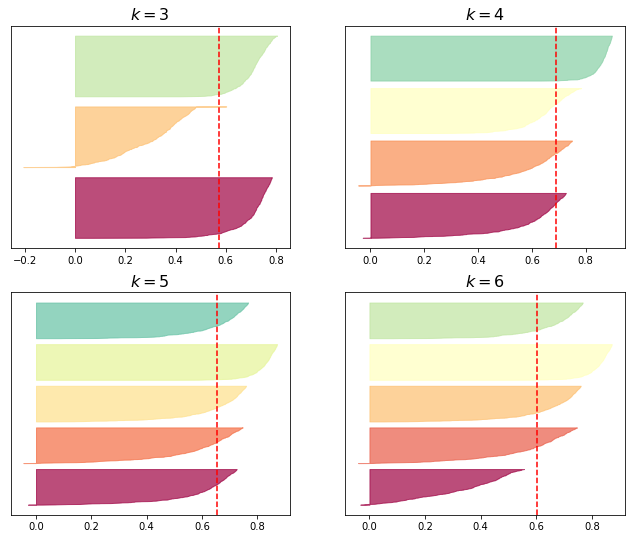

In [13]:
#실루엣 다이어그램

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 2, k-2)

    padding = len(X) // 30
    pos = padding
    ticks = []

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    for i in range(k):
        coeffs = silhouette_coefficients[y == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

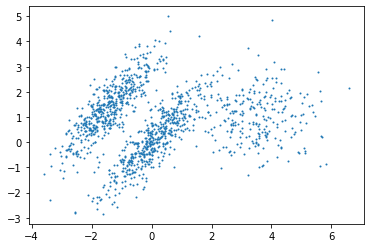

In [14]:
#원형이 아닌 데이터셋
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

2242.55042126599 0.42330347255623246
2179.6660887080325 0.3746488377389303


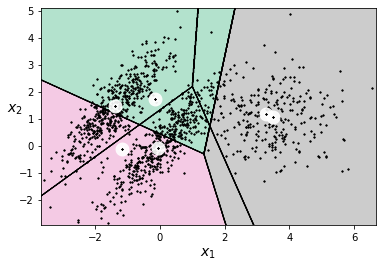

In [15]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

#이니셔, 실루엣점수
#결정 경계
print(kmeans_good.inertia_, silhouette_score(X, kmeans_good.labels_))
plot_decision_boundaries(kmeans_good, X)
print(kmeans_bad.inertia_,  silhouette_score(X, kmeans_bad.labels_))
plot_decision_boundaries(kmeans_bad, X)

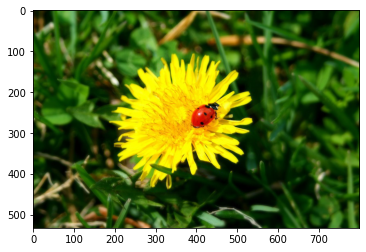

In [16]:
#군집을 사용한 이미지 분할
#색상 분할
from matplotlib.image import imread
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, filename)

image = imread(filename) #0~1
plt.imshow(image)

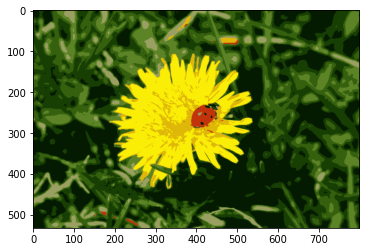

In [17]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

#각 픽셀에 할당된 클러스터 label에 맞게 픽셀값으로 클러스터 센트로이드 값을 넣는다.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

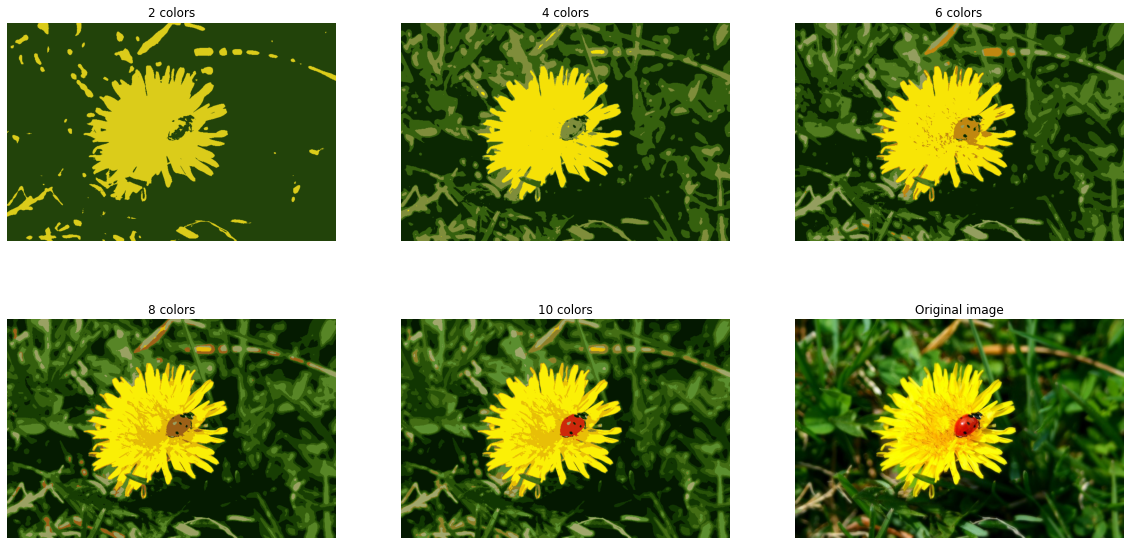

In [18]:
n_clusters = (2, 4, 6, 8, 10)
segmented_imgs = []
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


plt.figure(figsize=(20,10))

plt.subplot(236)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(231 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_cluster))
    plt.axis('off')
plt.show()

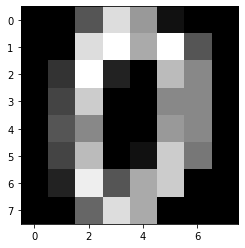

In [19]:
#군집을 통한 차원 축소
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

plt.imshow(X_digits[0].reshape(8,8), cmap='gray')

In [20]:
#전처리 없이
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

#군집 전처리
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                    ('kmeans', KMeans(n_clusters=50)),
                    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.9644444444444444
0.9777777777777777


In [21]:
#최적의 클러스터수 찾아보기
'''
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(30,110))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

from IPython.display import clear_output
clear_output()

print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = dict(kmeans__n_clusters=range(30,110))\ngrid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)\ngrid_clf.fit(X_train, y_train)\n\nfrom IPython.display import clear_output\nclear_output()\n\nprint(grid_clf.best_params_)\nprint(grid_clf.score(X_test, y_test))\n'

In [22]:
#준지도 학습
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.86

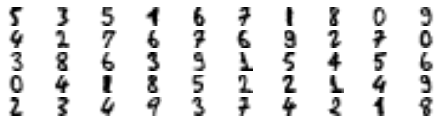

In [23]:
#훈련 세트를 50개의 클러스터로 모은다
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
#기존 특성수 -> 50개의 클러스터의 센트로이드까지의 거리로 맵핑된 세트
X_digits_dist = kmeans.fit_transform(X_train)
#클러스터별 센트로이드와 가장 가까운 이미지의 인덱스
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
#센트로이드를 대표하는 이미지들
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [24]:
#클러스터를 대표하는 훈련에만 레이블 수동 할당
y_representative_digits = y_train[representative_digit_idx]

In [25]:
#각 클러스터를 대표하는 이미지로 지도 학습
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9155555555555556

In [26]:
#각 클러스터에 있는 대표 레이블을 모든 샘플에 전파한다.
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

#레이블 전파후 훈련
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9466666666666667

In [27]:
print(X_digits_dist[0])
print(np.argmin(X_digits_dist[0]))
print(kmeans.labels_[0])

[44.19800328 39.82602738 52.25212723 47.18155111 50.55636736 25.62397774
 33.52764977 37.09521242 51.20871649 49.11383602 42.75335546 46.78158612
 37.94249222 47.11214148 28.59810157 51.84798895 41.54831525 37.6444326
 26.69076027 51.17361406 46.34343392 42.18804515 50.18308317 43.31150455
 47.85717697 51.86402945 46.66441794 40.33999495 44.72350956 53.95363089
 52.29765123 42.01640871 37.08072826 40.21530057 47.13242579 40.13511386
 43.12236951 54.4159827  49.42710338 45.44813351 51.51608163 34.77686811
 52.84584821 47.93852159 44.11698374 14.67119137 35.68180364 40.18200779
 39.34317987 42.02055962]
45
45


In [28]:
#모든 샘플에 레이블을 전파하기보다, 센트로이드와 가까운 특정 비율에만 전파한다

percentile_closest = 50

#각 샘플에 맞는 클러스터 센트로이드사이 거리
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    #클러스터에 포함되는 샘플
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    #특정 비율까지의 경계선을 찾는다.
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    #경계선보다 거리가 높은 것을 찾는다
    above_cutoff = (X_cluster_dist > cutoff_distance)
    #비율에 속하지 않는 클러스터속 샘플을 제거한다
    X_cluster_dist[in_cluster & above_cutoff] = -1

#샘플을 제외한 마스크
partially_propagated =  (X_cluster_dist != -1)
#제거완료한 훈련 샘플 세트
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg.score(X_test, y_test))

print(np.mean(y_train_partially_propagated == y_train[partially_propagated]))

0.9355555555555556
0.9927431059506531


[ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2  2  4  2  2  4  0  5  1  0
  5  5  3  2  2  2  4  5  0  6  1 -1  0  0  2  3 -1  3  4 -1  4  4  2  0
  6  2]


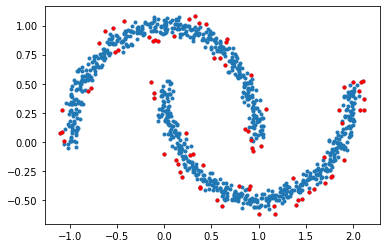

In [29]:
#DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

#-1 값은 이상치
print(dbscan.labels_[:50])

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[dbscan.labels_== -1, 0], X[dbscan.labels_==-1, 1], 'r.')

In [30]:
#핵심 샘플의 인덱스
print(len(dbscan.core_sample_indices_), dbscan.core_sample_indices_[:6])
#핵심 샘플의 성분
print(dbscan.components_.shape,'\n',dbscan.components_)

808 [0 4 5 6 7 8]
(808, 2) 
 [[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


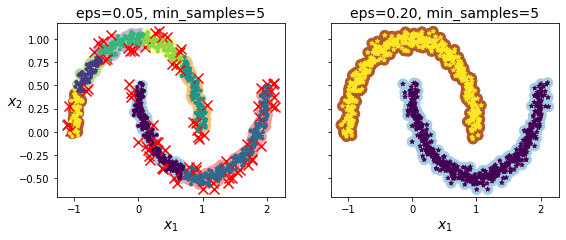

In [31]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    #핵심 샘플 = True
    core_mask[dbscan.core_sample_indices_] = True
    #이상치 샘플 = True
    anomalies_mask = dbscan.labels_ == -1
    #핵심도 이상치 샘플도 아닌 일반 샘플
    non_core_mask = ~(core_mask | anomalies_mask)
    
    #핵심 샘플 성분
    cores = dbscan.components_
    #이상치 샘플 성분
    anomalies = X[anomalies_mask]
    #일반 샘플 성분
    non_cores = X[non_core_mask]

    #핵심 샘플 scatter
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")

    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    #이상치 x 표시
    plt.scatter(anomalies[:, 0], anomalies[:, 1],c="r", marker="x", s=100)
    #일반 샘플
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=100, show_ylabels=False)
plt.show()
dbscan = dbscan2

In [32]:
from sklearn.neighbors import KNeighborsClassifier

#핵심 샘플만을 사용해서 훈련한 분류기
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

[1 0 1 0]
[[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


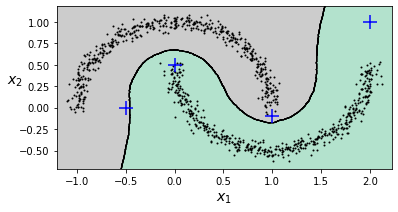

array([-1,  0,  1, -1])

In [33]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

In [34]:
#가우시안 혼합
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
print(X.shape, y.shape)

(1250, 2) (1250,)


In [35]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [36]:
print(gm.weights_.shape, gm.weights_)
print(gm.means_.shape, gm.means_)
print(gm.covariances_.shape, gm.covariances_)

(3,) [0.20961444 0.40005972 0.39032584]
(3, 2) [[ 3.39947665  1.05931088]
 [-1.40764129  1.42712848]
 [ 0.05145113  0.07534576]]
(3, 2, 2) [[[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]]


In [37]:
#수렴 여부
print(gm.converged_, gm.n_iter_)
#하드 클러스터링
print(gm.predict(X))
#소프트 클러스터링
print(gm.predict_proba(X))

True 4
[2 2 1 ... 0 0 0]
[[2.31833274e-02 6.76282339e-07 9.76815996e-01]
 [1.64110061e-02 6.74575575e-04 9.82914418e-01]
 [1.99781831e-06 9.99922764e-01 7.52377580e-05]
 ...
 [9.99999568e-01 2.12540639e-26 4.31902443e-07]
 [1.00000000e+00 1.45002917e-41 5.20915318e-16]
 [1.00000000e+00 7.93266114e-41 2.30971331e-15]]


In [38]:
#생성 모델
X_new , y_new = gm.sample(6)
print(X_new,'\n', y_new)
#확률 밀도 함수의 로그를 예측
gm.score_samples(X)

[[ 2.08689989  0.39558496]
 [ 3.14484918  2.41575026]
 [-1.67193884  1.21488819]
 [-1.8332875   1.2280957 ]
 [-1.56718181  0.39115816]
 [-0.31099618 -0.35349214]] 
 [0 0 1 1 1 2]


array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

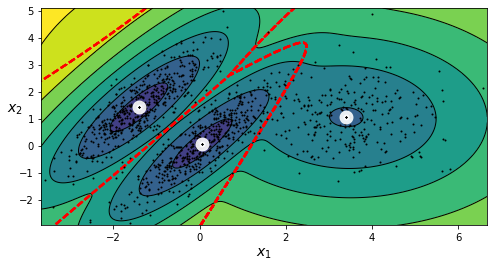

In [39]:
#확률 밀도 함수 등고선
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    #좌표 범위 설정
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    #모든 범위의 확률 밀도 값 측정
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #확률 밀도 값을 기준으로 등고선 작성
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')


    #각 클러스터의 결정경계 작성
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    #샘플 plot
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    #센트로이드 plot
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

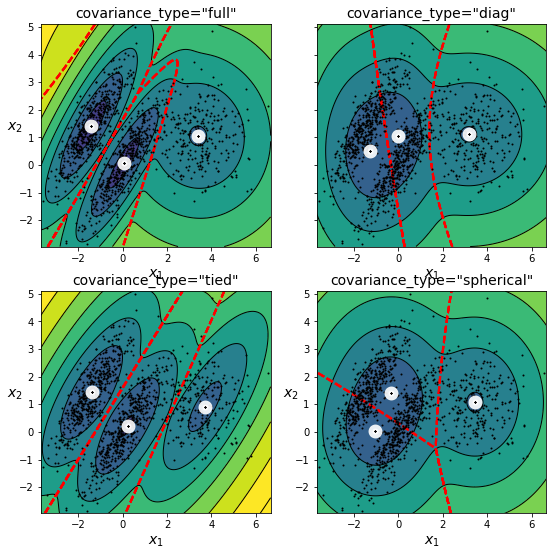

In [40]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, gm3, gm4, X):
    plt.figure(figsize=(14, 9))

    plt.subplot(231)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(232)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

    plt.subplot(234)
    plot_gaussian_mixture(gm3, X)
    plt.title('covariance_type="{}"'.format(gm3.covariance_type), fontsize=14)

    plt.subplot(235)
    plot_gaussian_mixture(gm4, X)
    plt.title('covariance_type="{}"'.format(gm4.covariance_type), fontsize=14)

compare_gaussian_mixtures(gm_full, gm_diag, gm_tied, gm_spherical, X)
plt.show()

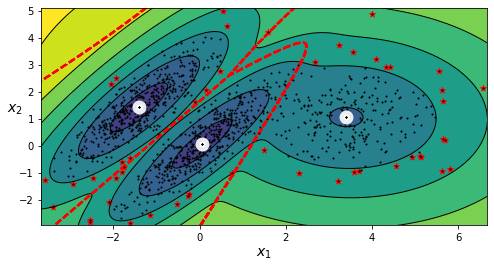

In [41]:
#가우시안 혼합 모델의 이상치 탐지
densities = gm.score_samples(X)
#4퍼센트 밖에 있는 샘플을 이상치로 탐지
density_threshold = np.percentile(densities, 4)
#이상치 데이터
anomalies = X[densities < density_threshold]


plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

In [42]:
#BIC AIC
print(gm.bic(X), gm.aic(X))

#클러스터수
n_clusters = 3
#데이터 차원
n_dims = 2
#
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)

bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

print(bic, aic)

8189.733705221635 8102.508425106597
8189.733705221635 8102.508425106597


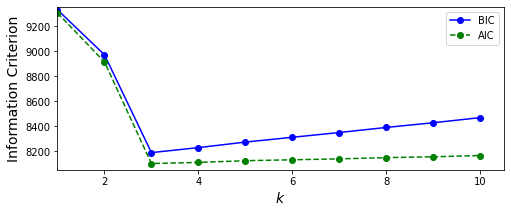

In [43]:
#1~10 까지 적합한 클러스터 수 BIC, AIC를 이용해서 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 10.5, np.min(aics) - 50, np.max(aics) + 50])
#plt.annotate('Minimum', xy=(3, bics[2]), xytext=(0.35, 0.6), textcoords='figure fraction', fontsize=14, arrowprops=dict(facecolor='black', shrink=0.1))

plt.legend()
plt.show()

In [44]:
#최적으 클러스터수 와 파라미터수 찾기
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(X).bic(X)

        if min_bic > bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print(best_k, best_covariance_type)

3 full


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=20,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')
[0.   0.39 0.2  0.4  0.   0.   0.   0.   0.   0.  ]


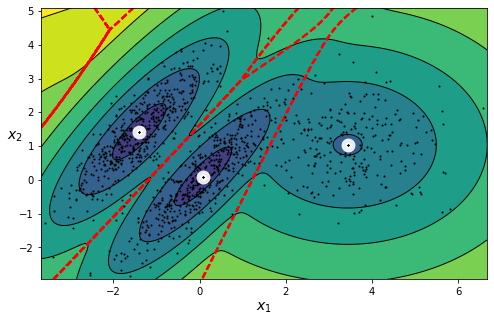

In [47]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=20, random_state=42)
print(bgm.fit(X))

# 필요한 클러스터는 3개
print(np.round(bgm.weights_, 2))

plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()